In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#set path of the csv file
df = pd.read_csv('/content/crop_production.csv - crop_production.csv.csv')

In [5]:
# using pivot table to transform dataframe
df_copy = pd.pivot_table(df,index=['State_Name', 'District_Name', 'Season', 'Crop'], columns='Crop_Year', values=['Area', 'Production'], aggfunc={'Area': np.mean, 'Production': np.mean}).swaplevel(0, 1, axis=1).sort_index(axis=1)
df_copy

Crop_Year                                                                     1997  ...       2015
                                                                              Area  ... Production
State_Name                  District_Name Season     Crop                           ...           
Andaman and Nicobar Islands NICOBARS      Autumn     Rice                      NaN  ...        NaN
                                                     Sugarcane                 NaN  ...        NaN
                                          Kharif     Arecanut                  NaN  ...        NaN
                                                     Other Kharif pulses       NaN  ...        NaN
                                                     Rice                      NaN  ...        NaN
...                                                                            ...  ...        ...
West Bengal                 PURULIA       Whole Year Tobacco                   NaN  ...        NaN
                                                     Turmeric                216.0  ...        NaN
                                          Winter     Potato                    NaN  ...        NaN
                                                     Rice                 315095.0  ...        NaN
                                                     Sesamum                   NaN  ...        NaN

[33017 rows x 38 columns]

In [6]:
# slicing the data frame
mid = int(len(df_copy.index)/2)-1
# print(mid)
df1 = df_copy.iloc[:mid, :]
# print(df1)
df2 = df_copy.iloc[mid+1:, :]
# print(df2)

In [7]:
# .isna() finds values with na values along columns and .sum() sums up no. of na values in each column
print('df1:',df1.isna().sum())

print()

print('df2:', df2.isna().sum())

df1: Crop_Year            
1997       Area          12543
           Production    12543
1998       Area          10999
           Production    11168
1999       Area          10301
           Production    10334
2000       Area           9422
           Production     9475
2001       Area           9243
           Production     9277
2002       Area           7685
           Production     7721
2003       Area           7456
           Production     7492
2004       Area           9150
           Production     9328
2005       Area           8781
           Production     8961
2006       Area           8819
           Production     9098
2007       Area           8535
           Production     8731
2008       Area           8705
           Production     8907
2009       Area           9166
           Production     9401
2010       Area           8428
           Production     8670
2011       Area           8439
           Production     8687
2012       Area           8288
           P

In [8]:
# ffill in df1
print('df1:\n',df1.ffill())

print()

# bfill in df2
print('df2:\n', df2.bfill())

df1:
 Crop_Year                                                                1997  ...       2015
                                                                         Area  ... Production
State_Name                  District_Name Season Crop                          ...           
Andaman and Nicobar Islands NICOBARS      Autumn Rice                     NaN  ...        NaN
                                                 Sugarcane                NaN  ...        NaN
                                          Kharif Arecanut                 NaN  ...        NaN
                                                 Other Kharif pulses      NaN  ...        NaN
                                                 Rice                     NaN  ...        NaN
...                                                                       ...  ...        ...
Maharashtra                 LATUR         Kharif Sugarcane            20700.0  ...        NaN
                                                 Sunfl

In [16]:
# replacing na values with mean of attributes in df1
df1 = df1.fillna(df1.mean())
print('df1: \n',df1)

# replacing na values with median of attributes in df2
df2 = df2.fillna(df2.median())
print('df2: \n', df2)

df1 = df1.fillna(0)
df2 = df2.fillna(0)

df1: 
 Crop_Year                                                                     1997  ...       2015
                                                                              Area  ... Production
State_Name                  District_Name Season Crop                               ...           
Andaman and Nicobar Islands NICOBARS      Autumn Rice                 16442.327195  ...        0.0
                                                 Sugarcane            16442.327195  ...        0.0
                                          Kharif Arecanut             16442.327195  ...        0.0
                                                 Other Kharif pulses  16442.327195  ...        0.0
                                                 Rice                 16442.327195  ...        0.0
...                                                                            ...  ...        ...
Maharashtra                 LATUR         Kharif Sugarcane            16442.327195  ...        0.0
   

Crop_Year                 1997                 1998  ...       2014 2015           
                          Area Production      Area  ... Production Area Production
Crop_Year                                            ...                           
1997      Area        1.000000   0.259273  0.738947  ...   0.078143  NaN        NaN
          Production  0.259273   1.000000  0.170757  ...   0.089825  NaN        NaN
1998      Area        0.738947   0.170757  1.000000  ...   0.062260  NaN        NaN
          Production  0.094171   0.106459  0.076537  ...   0.829675  NaN        NaN
1999      Area        0.736172   0.204463  0.885770  ...   0.073215  NaN        NaN
          Production  0.093600   0.109523  0.075303  ...   0.831422  NaN        NaN
2000      Area        0.680638   0.193128  0.800642  ...   0.073436  NaN        NaN
          Production  0.088709   0.105411  0.070465  ...   0.950238  NaN        NaN
2001      Area        0.667032   0.188177  0.799052  ...   0.071974  NaN    

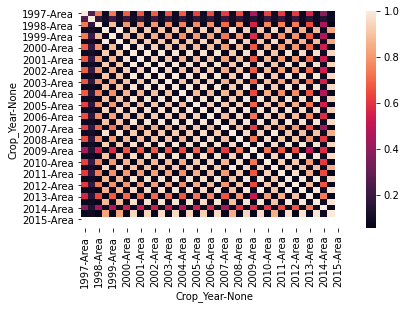

In [17]:
# for df1
# we could correlate using 'corr'
print(df1.corr())
sns.heatmap(df1.corr())

Crop_Year                 1997             ...      2015           
                          Area Production  ...      Area Production
Crop_Year                                  ...                     
1997      Area        1.000000   0.179268  ... -0.003473  -0.003355
          Production  0.179268   1.000000  ... -0.003109  -0.002462
1998      Area        0.148319   0.111302  ...  0.200003   0.182172
          Production  0.047299   0.600987  ...  0.023058   0.025036
1999      Area        0.148972   0.114798  ...  0.204970   0.189501
          Production  0.043246   0.494537  ...  0.016841   0.016946
2000      Area        0.148341   0.113684  ...  0.201195   0.183795
          Production  0.042263   0.480666  ...  0.018663   0.018408
2001      Area        0.149287   0.113045  ... -0.008598  -0.008103
          Production  0.043893   0.476525  ... -0.004080  -0.003856
2002      Area        0.147243   0.123336  ... -0.008871  -0.008358
          Production  0.039710   0.422224  ... -

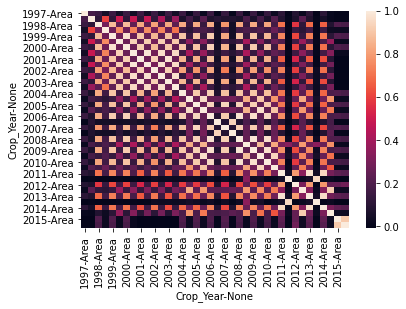

In [20]:
# for df2
print(df2.corr())
sns.heatmap(df2.corr())

In [21]:
# Min Max normalization on df1
from sklearn.preprocessing import MinMaxScaler
# creating the scaler object
scaler = MinMaxScaler()
# creating normalized dataframe
df1_norm = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

df1_norm

Crop_Year      1997                 1998  ...          2014 2015           
               Area Production      Area  ...    Production Area Production
0          0.025263   0.003827  0.018709  ...  1.488699e-03  0.0        0.0
1          0.025263   0.003827  0.018709  ...  1.488699e-03  0.0        0.0
2          0.025263   0.003827  0.018709  ...  1.488699e-03  0.0        0.0
3          0.025263   0.003827  0.018709  ...  1.488699e-03  0.0        0.0
4          0.025263   0.003827  0.018709  ...  1.488699e-03  0.0        0.0
...             ...        ...       ...  ...           ...  ...        ...
16502      0.025263   0.003827  0.030851  ...  1.488699e-03  0.0        0.0
16503      0.025263   0.003827  0.033897  ...  6.993007e-07  0.0        0.0
16504      0.005831   0.000198  0.018709  ...  1.488699e-03  0.0        0.0
16505      0.114166   0.001369  0.101694  ...  1.488699e-03  0.0        0.0
16506      0.025263   0.003827  0.018709  ...  1.488699e-03  0.0        0.0

[16507 rows x 38 columns]

In [24]:
# using standard scaler for df2
from sklearn.preprocessing import StandardScaler
# creating standardscaler object
standardScaler = StandardScaler()
# normalized values
df2_norm = pd.DataFrame(standardScaler.fit_transform(df2), columns = df2.columns)

df2_norm

Crop_Year      1997                 1998  ...       2014      2015           
               Area Production      Area  ... Production      Area Production
0          0.144085  -0.055066  0.653290  ...  -0.045039 -0.049995  -0.047296
1         -0.072840  -0.062821 -0.085037  ...  -0.064474 -0.049995  -0.047296
2         -0.075389  -0.062606 -0.189794  ...  -0.063280 -0.049995  -0.047296
3         -0.082630  -0.065213 -0.166661  ...  -0.065886 -0.049995  -0.047296
4         -0.072840  -0.062821 -0.181502  ...  -0.064474 -0.049995  -0.047296
...             ...        ...       ...  ...        ...       ...        ...
16504     -0.072840  -0.062821 -0.189794  ...  -0.064474 -0.049995  -0.047296
16505     -0.082056  -0.065079 -0.209699  ...  -0.064474 -0.049995  -0.047296
16506     -0.072840  -0.062821 -0.189794  ...  -0.064474 -0.049995  -0.047296
16507      2.292781   0.851662  8.209896  ...   1.491869 -0.049995  -0.047296
16508     -0.072840  -0.062821 -0.189794  ...  -0.065917 -0.049995  -0.047296

[16509 rows x 38 columns]